<a href="https://colab.research.google.com/github/DerrickKuria/Regression-in-Machine-Learning/blob/master/Derrick_Kuria_Copy_of_Machine_Learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***FOOTBALL MATCH PREDICTION***

---



### **1. Defining the Question**

## **a) Specifying the question**








Having received a task from MCHEZO PESA Limited  to do 
A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly or a Competition game. 

## **b) Defining the Metric of Success**

The metric of success is to get get a high perentage on the predictions of Football matches played by the different countries in the different tournaments and friendlies

## **c)Understanding the context**

Soccer opponents are either in clubs or countries and the latter is what we will focus on. Football can also be a friendly match or a Competition. Friendly matches are mostly for fitness and do not have much competition for nothing is at stake. On the other hand,Competition football usually has agility for there is either a pursuit for points if it is a league or a pursuit for staying in the competition if it is a knock out match.

Most of soccer games played by Countries are either friendlies( for match fitness and team cognition or Knock outs in competitions where there is a price at the end of the tournament eg .WORLDCUP

## **d)Recording the Experimental Design**

1. Linear Regression
2. Polynomial Regression
3. Logistic regression

## **e) Data Relevance**

We shall use two Datasets. 
1. Fifa Rankings Dataset - Over years, Countries have been rankedby how they perform in the international teams against other countries. There is an award system specifically curated for how Teams get points based on their results in friendlies and competitions. The Rankings at the time this project was done were as shown [here](https://www.fifa.com/fifa-world-ranking/ranking-table/men/). However our dataset was taken earlier hence having different rankings.
2. Results Datasets - This is a record of how teams have performed against each other in the past.




## **2. Reading the Data**

First we load the libraries to be used:

In [0]:

#Numpy is a library for python that supports multidimensional arrays and matrices as well as mathematical functions
import numpy as np
#Pandas is Python library used for data manipulation and data analysis
import pandas as pd
#Matplotlib is a python library utilised in plotting and its numerical capabilities
import matplotlib.pyplot as plt
#Seaborn is a Python data visualisation library basrd on matplotlib.
import seaborn as sns
#Is a function in Sklearn for splitting data into two subsets: training set and testing set 
from sklearn.model_selection import train_test_split
#This is used to import linearregression model
from sklearn.linear_model import LinearRegression
#This is used to import the LogisticRegression model
from sklearn.linear_model import LogisticRegression 


To get the Data used for this project you can get it [here](https://drive.google.com/open?id=1BYUqaEEnFtAe5lvzJh9lpVpR2MAvERUc)

## a).Import Data

In [0]:
results = pd.read_csv('/content/results.csv')

In [0]:
fifa = pd.read_csv('/content/fifa_ranking.csv')

##**3.Checking the data** 

In [0]:
#Lets inspect the first 10 columns in the Fifa_ranking Dataset
fifa.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [0]:
#inspecting the last 10 items in the Fifa_ranking Dataset
fifa.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [0]:
#Lets inspect the first 10 columns in the results Dataset
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [0]:
#inspecting the last 10 items in the results Dataset
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


**information abour our Datasets**

In [0]:
#Our Datasets information
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [0]:
#Data information of results
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


**Check columns**

In [0]:
#Fifa columns
fifa.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

**Fifa_ranking dataset columns explained**
1. Rank -  The position of a country at June 2018

2. Country Full-  The country's name

3. total Points -  These are the total points a ccountry has accrued after playing against other countries
4. previous_points - THe points before changes were made.

5. Rank_change - This is the positive or negative points taken or lost between the time of doing the rank adjustments. 

6. cur_year_avg - Current Year average- Points accrued in the last before obtaining the dataset(probably 2018)

7. cur_year_avg_weighted - The average of the points per games played accrued in the year last year of obtaining the dataset only 

8. last_year_avg - Points accrued in the year before obtaining the dataset(probably 2017)

9. last_year_avg_weighted - The average of the points per games played accrued in the year before year of obtaining the dataset only 

10. two_year_ago_avg - Points accrued in the second year before obtaining the dataset(probably 2016)

11. two_year_ago_weighted - The average of the points per games played accrued in the second year of obtaining the dataset only 

12. three_year_ago_avg - Points accrued in the second year before obtaining the dataset(probably 2015)

13. three_year_ago_weighted	-  The average of the points per games played accrued in the third year of obtaining the dataset only 

14. confederation	 - The Competition played. This is mostly dependent on the countries location

15. rank_date - THe specific date the ranking points were updated.


In [0]:
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

**Results Dataset Columns explained**
1. date - The specific Timestamp of the game being played.

2. home_team - The team hosting the away team.(Though this is subject to neutral being false). 

3. away_team - The visiting team(Though this is subject to neutral being false)

4. home_score - This is the number of goals home team has scored/ Away team has conceded.

5. away_score - This is the number ofgoals the away eam has scored/ Home team has conceded.

6. tournament - This is the name of the tournament being played. This is dependent on the Countries location eg. CAF and the countries football prowess to attend global competitions eg Worldcup.

7. city - The city where the game was hosted.

8. country- THe country where the game was hosted

9. neutral -If a ground in neutral it means none of the teams played in their own country(Mostly for worldcup)

**Check for the Data Shape**

In [0]:
fifa.shape

(57793, 16)

In [0]:
results.shape

(40839, 9)

**Describe**

Getting summary statistics of the numerical columns
using Describe we get the count , mean , Standard Deviation , minimum , 1st Quartile - 25%,Median - 50%, 
3rd Quartile - 75 % and Maximum value of all numerical 
Variables

In [0]:
fifa.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [0]:
results.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


**Check for categorical columns in our datasets**

In [0]:
# Identify categorical columns and create a list of them
#
categorical = fifa.dtypes ==object
categorical_cols = fifa.columns[categorical].tolist()
print(f"The categorical columns are: \n{categorical_cols}")

The categorical columns are: 
['country_full', 'country_abrv', 'confederation', 'rank_date']


In [0]:
results = results.rename(columns = {'country':'country_full'})
results.head(1)

,date,home_team,away_team,home_score,away_score,tournament,city,country_full,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False


Merging the datasets into one using an inner join on country full

In [0]:
fifa_joint = fifa.merge(results, how='inner', on='country_full')
fifa_joint.head()


,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,neutral
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1909-04-04,Germany,Switzerland,1,0,Friendly,Karlsruhe,False
1,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1910-05-16,Germany,Belgium,0,3,Friendly,Duisburg,False
2,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1910-10-16,Germany,Netherlands,1,2,Friendly,Kleve,False
3,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1911-03-26,Germany,Switzerland,6,2,Friendly,Stuttgart,False
4,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1911-10-09,Germany,Austria,1,2,Friendly,Dresden,False


For the dataset of Fifa, We have four categorical columns which are shown above

In [0]:
#Check anomalies 
print (fifa_joint.nunique())

rank                         209
country_full                 196
country_abrv                 196
total_points               10297
previous_points             1556
rank_change                  121
cur_year_avg                6925
cur_year_avg_weighted       6925
last_year_avg               6958
last_year_avg_weighted      6546
two_year_ago_avg            7049
two_year_ago_weighted       6128
three_year_ago_avg          7128
three_year_ago_weighted     5569
confederation                  6
rank_date                    286
date                       13974
home_team                    302
away_team                    302
home_score                    25
away_score                    22
tournament                   104
city                        1733
neutral                        2
dtype: int64


##4.External Data Source Validation

**Check the outliers**

Fifa joint Dataset Outliers

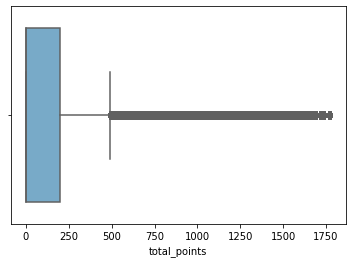

In [0]:
sns.boxplot(x=fifa_joint['total_points'], palette='Blues')


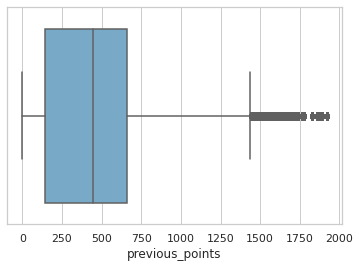

In [0]:
sns.boxplot(x=fifa_joint['previous_points'], palette='Blues')

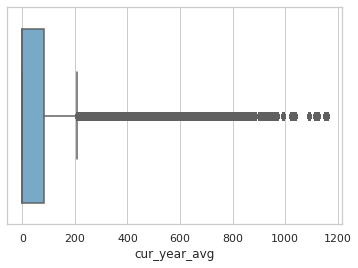

In [0]:
sns.boxplot(x=fifa_joint['cur_year_avg'], palette='Blues')

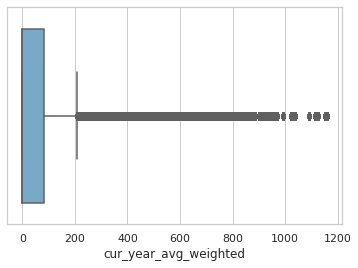

In [0]:
sns.boxplot(x=fifa_joint['cur_year_avg_weighted'], palette='Blues')

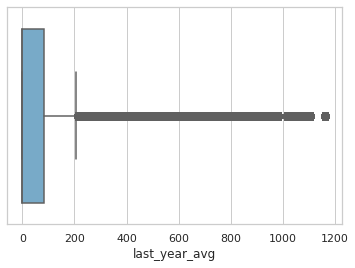

In [0]:
sns.boxplot(x=fifa_joint['last_year_avg'], palette='Blues')

For all the Numerical columns in Fifa Ranking ,we see there are outliers in the upper quartile .However , we will keep that data as we are not very sure if it will be useful in either of the regression models

Result Dataset

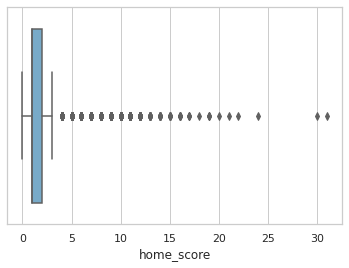

In [0]:
sns.boxplot(x=results['home_score'], palette='Blues')

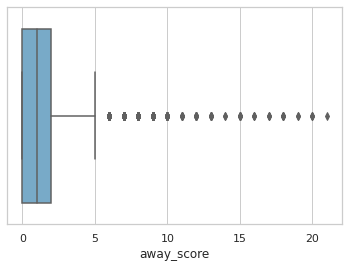

In [0]:
sns.boxplot(x=results['away_score'], palette='Blues')

For all the Numerical columns in Results  ,we see there are outliers in the upper quartile .However , we will keep that data as we are not very sure if it will be useful in either of the regression models

## 5.Tidying the Data

In [0]:
#Check for null values in both datasets

In [0]:
fifa_joint.isna().sum() 

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
date                       0
home_team                  0
away_team                  0
home_score                 0
away_score                 0
tournament                 0
city                       0
neutral                    0
dtype: int64

Since our data is clean and has no Null values we can proceed.

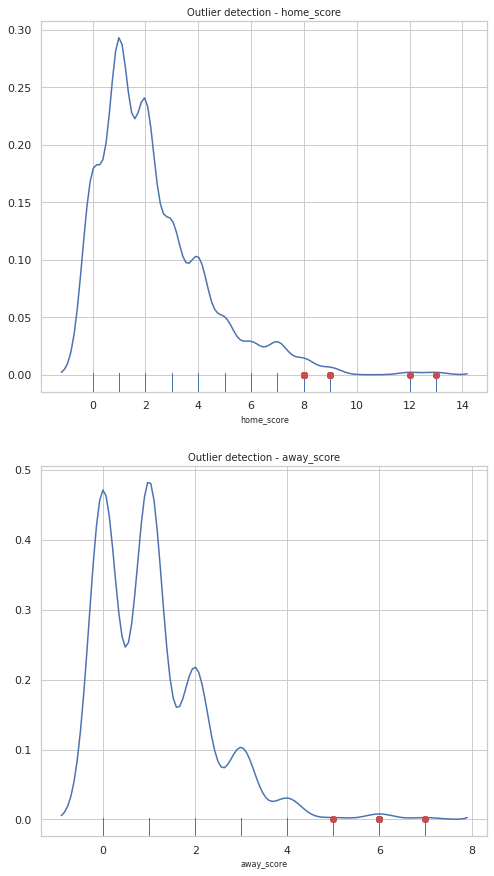

In [0]:
#Outlier detection using the percentiles

def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

col_names = ['home_score','away_score']

fig, ax = plt.subplots(len(col_names), figsize=(8,15))

for i, col_val in enumerate(col_names):
    y = fifa_joint[col_val][:1000]
    sns.distplot(y, ax=ax[i], rug=True, hist=False)
    outliers = y[percentile_based_outlier(y)]
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    ax[i].set_title('Outlier detection - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

## *6.EXPLORATORY DATA ANALYSIS*

In [0]:
#Convert to Numerics
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
fifa_joint['confederation'] = en.fit_transform(fifa_joint['confederation'])
fifa_joint['tournament'] = en.fit_transform(fifa_joint['tournament'])


## **a).Univariate**

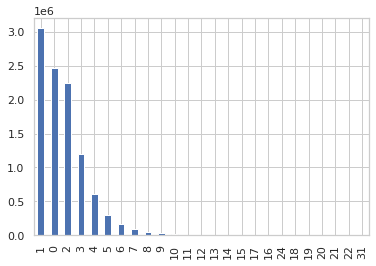

In [0]:
fifa_joint['home_score'].value_counts().plot(kind= 'bar')

From this we observe that most teams were able to score atleast one goal when at home

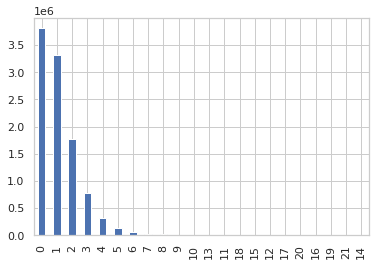

In [0]:
fifa_joint['away_score'].value_counts().plot(kind= 'bar')

This shows the away teams mostly scored zero goals.

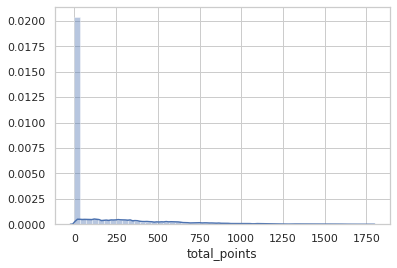

In [0]:
sns.distplot(fifa.total_points);

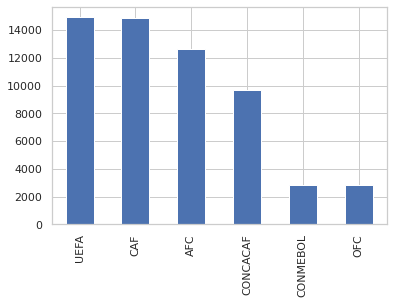

In [0]:
fifa['confederation'].value_counts().plot.bar()

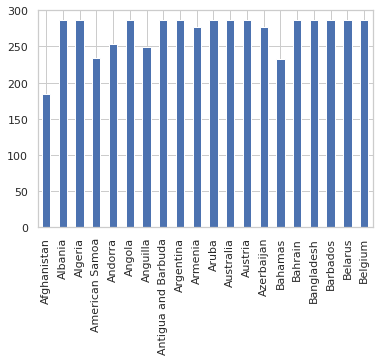

In [0]:
fifa['country_full'].value_counts().sort_index().head(20).plot.bar()

## **b).Bivariate**

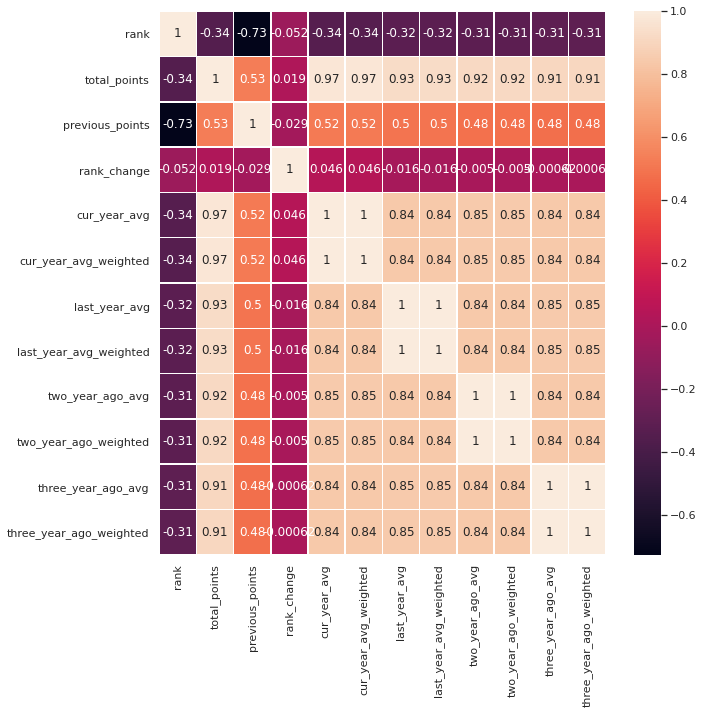

In [0]:
# Create a correlation matrix
corrMatrix = fifa.corr()
corrMatrix

# Vizualise the correlation matrix using a heat map

fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corrMatrix, annot=True,  linewidths=.5, ax=ax)

## **Detecting** **Multicollinearity**

In [0]:

#To do multicollinearity we will use independent variables only.
independent_only = fifa_joint.drop(columns=['home_score', 'away_score'])



In [0]:
# Let's display the correlations between the variables
correlations = independent_only.corr()

correlations

In [0]:
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

In [0]:
#We are going to drop three years ago weighted  and  three_year_ago_avgfor it has a value as big as 5 .6 so we will drop it. 

independent_only1 = independent_only.drop(columns=['three_year_ago_weighted', 'three_year_ago_avg','two_year_ago_avg','two_year_ago_weighted'])
correlations = independent_only1.corr()

In [0]:
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

In [0]:
#Lastly we will get rid of total points which now has a value of 7.5

In [0]:
independent_only2 = independent_only.drop(columns=['total_points','two_year_ago_weighted','three_year_ago_avg'])
correlations = independent_only2.corr()

In [0]:
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

Residual plots and heteroskedasticity testing

In [0]:

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#The indepedent variables are rank	previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,
#last_year_avg,last_year_avg_weighted,two_year_ago_avg,three_year_ago_weighted
X = fifa[['rank']].values
y = fifa['total_points'].values



In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# This is our prediction for admission based on our model
x_predict = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(x_predict, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

Our mean on the other hand is close to 0, indicating that we tend to be fairly correct, although slightly over estimating chances by, on average, 0.03%

Let's show the residual plot

We will do a Heteroskedasticity Test.

in regression, multicollinearity refers to the extent to which independent variables are correlated. Multicollinearity exists when:

One independent variable is correlated with another independent variable.
One independent variable is correlated with a linear combination of two or more independent variables.

## ***7).BARTLETT'S TEST***

Bartlett's test is a Scipy module.It was developed by Maurice Stevenson Bartlett. Ittests the Null hypoyhesis all input samples are from populations with equal variances. 


Simply it is a statistical procedure for testing if K population samlples have equal variances.

In [0]:
#We will import Scipy 
import scipy as sp

test_result, p_value = sp.stats.bartlett(x_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(x_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(p_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

## 8.Regression Analysis

This is a method used for estimation of relationships between dependent variables and one or more independent variables.

In [0]:
fifa_joint.head()

NameError: ignored

## **i). Linear regression**

We will perform 2  models, one for home  teamss and another for away teams. Remember from our univariate we noticed that most Home teams scored  one goal atleast and most away goals did not score. 

In [0]:
# We will define our dependent(Y) and independent(X) variables.

X = fifa_joint[['home_team']].values
y = fifa_joint['home_score'].values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:


plt.scatter(x_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

So using this we can notice that Tournament is Categorical hence we need to do an encode.

In [0]:
# Identify categorical columns and create a list of them
#
categorical1 = fifa_joint.dtypes ==object
categorical_columns2 = fifa_joint.columns[categorical1].tolist()
print(f"The categorical columns in the Dataset Fifa_joint  are: \n{categorical_columns2}")

In [0]:
#Installing One Hot encoder

from sklearn.preprocessing import OneHotEncoder

##**ii).Polynomial Regression**

**MODEL 1**

Our Task is to predict how many goal the Home team scores.

Dependent Variable is Home_team score 

Independent Variable is tournament,home_team,away_team, rank

In [0]:
#We are going to fit a linear model with Coefficients to minimize residual sum of Squares , hence we import Linear model
from sklearn import linear_model
#GridSearch CV impliments a 'fit'and 'score'method  hence we will import it.
from sklearn.model_selection import GridSearchCV
#Pipeline of transform with a final estimator
from sklearn.pipeline import Pipeline

In [0]:
#Polynomial features enables us to plot a line 
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression


In [0]:
fifa_joint.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,neutral
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1909-04-04,Germany,Switzerland,1,0,Friendly,Karlsruhe,False
1,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1910-05-16,Germany,Belgium,0,3,Friendly,Duisburg,False
2,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1910-10-16,Germany,Netherlands,1,2,Friendly,Kleve,False
3,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1911-03-26,Germany,Switzerland,6,2,Friendly,Stuttgart,False
4,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1911-10-09,Germany,Austria,1,2,Friendly,Dresden,False


In [0]:
#MODEL 1: Predict how many goals the home team scores.
# home score will be our dependent variable
from sklearn import metrics
# We will use 4 independent variables for this
X = fifa_joint[['away_score', 'rank', 'previous_points', 'rank_change']].values
y = fifa_joint['home_score'].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# find optimal coefficients and intercept
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

# assess the accuraccy of the model
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.2436687792945043
Mean Squared Error: 2.925608344392839
Root Mean Squared Error: 1.7104409795116695


The RMSES is 1.7104. Let's now cross validate our model by using k-fold cross validation. We will use 5 folds.



In [0]:
#We obtain the independent variables by checking the a
from sklearn.model_selection import KFold

# We will use the same 4 independent variables for this
X = fifa[['rank','previous_points','rank_change','cur_year_avg','cur_year_avg_weighted','last_year_avg','last_year_avg_weighted','two_year_ago_avg','three_year_ago_weighted']].values
y = fifa['total_points'].values

folds = KFold(n_splits=5)

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

print('******************************************************')

print('The Root Mean Sum of Squares is:',np.mean(RMSES))

## iii).Logistic Regression

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable.

**Logistic Regression Assumptions:**

1. Binary logistic regression requires the dependent variable to be binary.

2. For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.

3. Only the meaningful variables should be included.

4. The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.

5. The independent variables are linearly related to the log odds.

6. Logistic regression requires quite large sample sizes.

In [0]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [0]:
fifa_joint.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,neutral
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1909-04-04,Germany,Switzerland,1,0,Friendly,Karlsruhe,False
1,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1910-05-16,Germany,Belgium,0,3,Friendly,Duisburg,False
2,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1910-10-16,Germany,Netherlands,1,2,Friendly,Kleve,False
3,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1911-03-26,Germany,Switzerland,6,2,Friendly,Stuttgart,False
4,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1911-10-09,Germany,Austria,1,2,Friendly,Dresden,False


In [0]:
fifa_joint.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date', 'date',
       'home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'city', 'neutral'],
      dtype='object')

In [0]:
fifa_sample = clean_df.sample(1000

In [0]:
# Converting categorical variables to a dummy indicators
# ---
# The next thing we need to do is reformat our variables so that they work with the model. 
# Specifically, we need to reformat the Sex and Embarked variables into numeric variables.
#
neutral = pd.get_dummies(fifa_joint['neutral'],drop_first=False)
neutral.head()

In [0]:
fifa_joint.drop(['three_year_ago_weighted', 'cur_year_avg','cur_year_avg_weighted','last_year_avg',	'last_year_avg_weighted','two_year_ago_avg',	'two_year_ago_weighted','three_year_ago_avg'],axis=1,inplace=True)

In [0]:
fifa_joint1 = pd.concat([fifa_joint,neutral],axis=1)

In [0]:
fifa_joint1

In [0]:
#We will use our dataset to set the outcome of the match as folllows:
#0 will represent a win for the home team
fifa_joint1.loc[fifa_joint1['home_score'] > fifa_joint1['away_score'] , 'outcome'] = '0' 
# 1 will reperesnt a  draw
fifa_joint1.loc[fifa_joint1['home_score'] == fifa_joint1['away_score'] , 'outcome'] ='1'
# 2 will reperesent a win for the away team
fifa_joint1.loc[fifa_joint1['home_score'] < fifa_joint1['away_score'] , 'outcome'] = '2'  


fifa_joint1

In [0]:
#Convert to Numerics
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
fifa_joint1['confederation'] = en.fit_transform(fifa_joint1['confederation'])
fifa_joint1['tournament'] = en.fit_transform(fifa_joint1['tournament'])
fifa_joint1['home_team'] = en.fit_transform(fifa_joint1['home_team'])
fifa_joint1['away_team'] = en.fit_transform(fifa_joint1['away_team'])

Hyperparameter tuning

In [0]:
# Defining  the independent variable(X) and the Dependent variables y

X = fifa_joint1[['home_team', 'away_team', 'home_score', 'away_score', 'tournament']].values
y = fifa_joint1['outcome'].values

In [0]:
# Initiate the logistic regression model with random hyperparameters
# We will set the penalty= 12 and maximum iterations of 110

lr = LogisticRegression(penalty='l2',dual=False,max_iter=110)

In [0]:
# Fit the X and y variables to the logistic regression model

lr.fit(X,y)

In [0]:
# Use the model to make a prediction

y_pred = LogReg.predict(X_test)
y_pred

In [0]:
# Finding the model score.

LogReg.score(X_test, y_test)

In [0]:
fifaresults = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
fifaresults

In [0]:
# Show the classification report of the model

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [0]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

In [0]:
fifa_sample = fifa_joint.sample(1000)
fifa_sample.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,neutral
2518046,24,Uruguay,URU,0.00,662,-1,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,2002-08-14,1960-07-09,Uruguay,Brazil,1,0,Atlantic Cup,Montevideo,False
556173,41,Sweden,SWE,0.00,723,0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,2009-10-16,1993-10-13,Sweden,Finland,3,2,FIFA World Cup qualification,Solna,False
4746235,76,Qatar,QAT,0.00,506,3,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,AFC,2002-04-17,2004-05-31,Qatar,Turkmenistan,5,0,Friendly,Doha,False
637653,22,Argentina,ARG,0.00,53,-3,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1996-12-18,1996-09-01,Argentina,Paraguay,1,1,FIFA World Cup qualification,Buenos Aires,False
1135060,24,Norway,NOR,796.68,793,0,335.1,335.1,552.67,276.33,484.94,145.48,198.85,39.77,UEFA,2012-03-07,1919-06-29,Norway,Sweden,4,3,Friendly,Kristiania,False


In [0]:
#We will use our dataset to set the outcome of the match as folllows:
#0 will represent a win for the home team
fifa_sample.loc[fifa_sample['home_score'] > fifa_sample['away_score'] , 'outcome'] = '0' 
# 1 will reperesnt a  draw
fifa_sample.loc[fifa_sample['home_score'] == fifa_sample['away_score'] , 'outcome'] ='1'
# 2 will reperesent a win for the away team
fifa_sample.loc[fifa_sample['home_score'] < fifa_sample['away_score'] , 'outcome'] = '2'

In [0]:
#After obtaining outcome column, we will get rid of home and away scores.

fifa_sample = fifa_sample.drop(['home_score', 'away_score' ], axis=1)
fifa_sample.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,home_team,away_team,tournament,city,neutral,outcome
2518046,24,Uruguay,URU,0.00,662,-1,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,2002-08-14,1960-07-09,Uruguay,Brazil,Atlantic Cup,Montevideo,False,0
556173,41,Sweden,SWE,0.00,723,0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,2009-10-16,1993-10-13,Sweden,Finland,FIFA World Cup qualification,Solna,False,0
4746235,76,Qatar,QAT,0.00,506,3,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,AFC,2002-04-17,2004-05-31,Qatar,Turkmenistan,Friendly,Doha,False,0
637653,22,Argentina,ARG,0.00,53,-3,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1996-12-18,1996-09-01,Argentina,Paraguay,FIFA World Cup qualification,Buenos Aires,False,1
1135060,24,Norway,NOR,796.68,793,0,335.1,335.1,552.67,276.33,484.94,145.48,198.85,39.77,UEFA,2012-03-07,1919-06-29,Norway,Sweden,Friendly,Kristiania,False,0


In [32]:
fifa_joint.drop(['city'], axis=1)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,neutral
0,1,Germany,GER,0.00,57,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1909-04-04,Germany,Switzerland,1,0,Friendly,False
1,1,Germany,GER,0.00,57,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1910-05-16,Germany,Belgium,0,3,Friendly,False
2,1,Germany,GER,0.00,57,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1910-10-16,Germany,Netherlands,1,2,Friendly,False
3,1,Germany,GER,0.00,57,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1911-03-26,Germany,Switzerland,6,2,Friendly,False
4,1,Germany,GER,0.00,57,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1911-10-09,Germany,Austria,1,2,Friendly,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10246505,195,Gibraltar,GIB,34.16,34,1,34.16,34.16,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,2018-06-07,2018-09-06,Gibraltar,North Macedonia,0,2,UEFA Nations League,False
10246506,195,Gibraltar,GIB,34.16,34,1,34.16,34.16,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,2018-06-07,2018-10-16,Gibraltar,Liechtenstein,2,1,UEFA Nations League,False
10246507,195,Gibraltar,GIB,34.16,34,1,34.16,34.16,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,2018-06-07,2018-11-16,Gibraltar,Armenia,2,6,UEFA Nations League,False
10246508,195,Gibraltar,GIB,34.16,34,1,34.16,34.16,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,2018-06-07,2019-03-23,Gibraltar,Republic of Ireland,0,1,UEFA Euro qualification,False


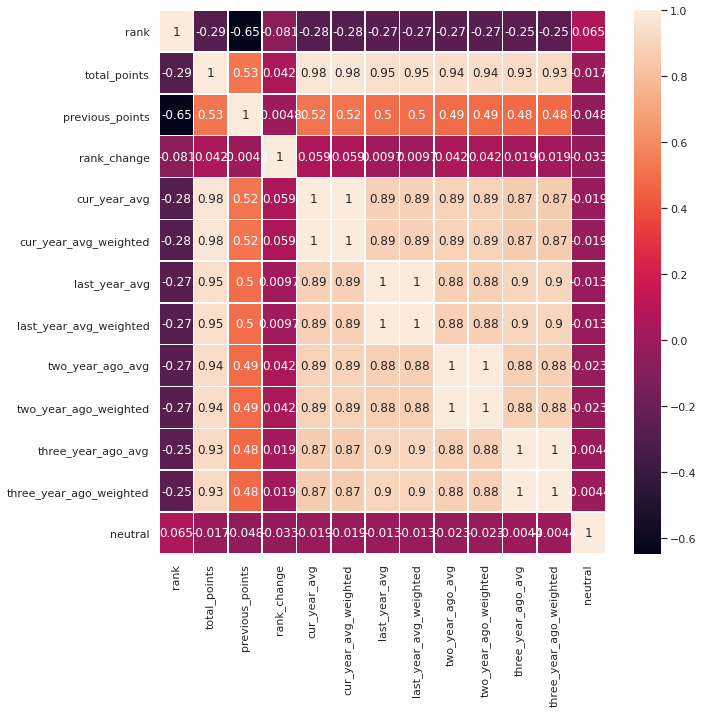

In [33]:
# Create a correlation matrix
corrMatrix = fifa_sample.corr()
corrMatrix
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corrMatrix, annot=True,  linewidths=.5, ax=ax)

In [0]:
# Then we split our dataset and drop our outcome variable.
#
X = fifa_sample.drop("outcome",axis=1)
y = fifa_sample["outcome"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=25)